### Цель работы:

Осуществить предварительную обработку данных csv-файла, выявить и устранить проблемы в этих данных.

### Порядок выполнения работы:

1. Простейшая регрессия
2. Полиномиальная регрессия
3. Решение задачи регрессии различными методами

### Вариант задания - 3


---

### Загрузка данных

Первым делом импортируем все необходимые для выполнения работы библиотеки, а именно:

1. pandas - для загрузки данных, очистки, трансформации, агрегации и анализа табличных данных
2. numpy - для численных вычислений, операций с матрицами и математических функций
3. matplotlib - для создания статических, анимированных и интерактивных визуализаций
4. sklearn - для машинного обучения: предобработки данных, обучения моделей и оценки результатов
5. seaborn - для более красивых и информативных статистических графиков поверх matplotlib

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

Была выполнена загрузка датасета для регрессионного анализа из файла 'regression.xlsx'. Датасет содержит 1000 наблюдений и 3 переменные: две независимые переменные x1, x2 и целевую переменную y. Все данные представлены в числовом формате float64, пропущенные значения отсутствуют.

In [44]:
rg = pd.read_excel('regression.xlsx')
rg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   y       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


---

### 1. Простейшая регрессия

Модель была обучена с использованием простой линейной регрессии. Для этого сначала были подготовлены данные - выделена целевая переменная y и признаки x1, x2. Данные разделены на тренировочную и валидационную выборки в соотношении 75% на обучение и 25% на валидацию, с фиксированным random_state для обеспечения воспроизводимости результатов. Для каждого признака созданы отдельные модели: сначала обучена модель для предсказания y по x1, затем для предсказания y по x2. При обучении выполнено преобразование данных в numpy arrays с изменением формы для корректной работы алгоритма линейной регрессии.

In [45]:
# Подготовка данных
y = rg['y'] # столбец с целевой переменной
X1 = rg['x1'] # признак 1
X2 = rg['x2'] # признак 2
# Разделение на тренировочную и валидационную выборки для x1
X1_train, X1_valid, y_train, y_valid = train_test_split(X1, # признаки
    y,              # целевая переменная
    test_size=0.25, # размер тестовой/валидационной выборки (25% данных на валидацию (valid), 75% на обучение(train))
    random_state=0  # Seed для воспроизводимости (для одинаковых результатов)
)
# Разделение на тренировочную и валидационную выборки для x2
X2_train, X2_valid, y_train2, y_valid2 = train_test_split(
    X2, y,
    test_size=0.25,
    random_state=0
)
# Обучение модели для x1
model_x1 = LinearRegression()   # Создали пустую модель-коробку
model_x1.fit(                   # обучаем модель на данных (заполняем коробку знаниями)
    np.array(X1_train)          # Превращаем данные из формата pandas в numpy
             .reshape(-1,1),    # Меняем форму: (-1 = автоматически рассчитывает количество строк, 1 = делает 1 столбец)
             y_train)           # y - то, что хотим предсказать, Правильные ответы,
                                # которые модель должна научиться предсказывать
# Обучение модели для x2
model_x2 = LinearRegression()
model_x2.fit(np.array(X2_train).reshape(-1,1), y_train2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


После обучения моделей линейной регрессии для признаков x1 и x2 были выполнены предсказания на валидационных выборках. Это позволяет оценить качество моделей на данных, которые не участвовали в обучении. Для модели, обученной на признаке x1, были получены предсказания predictions_x1_valid, а для модели на признаке x2 - predictions_x2_valid.

In [46]:
# Предсказание на валидационных выборках
predictions_x1_valid = (model_x1                    # берем обученную модель
                        .predict(                   # команда предсказания
                                 np.array(X1_valid) # превращаем в numpy
                                 .reshape(-1,1)))   # меняем форму как до этого
predictions_x2_valid = model_x2.predict(np.array(X2_valid).reshape(-1,1))

# Предсказание на всех данных (для анализа и визуализации)
predictions_x1_full = model_x1.predict(np.array(X1).reshape(-1,1))
predictions_x2_full = model_x2.predict(np.array(X2).reshape(-1,1))

Для сравнения фактических значений целевой переменной с предсказаниями обеих моделей был создан единый датафрейм. В нем содержатся фактические значения из столбца y, а также предсказания, полученные моделью на основе признака x1 и моделью на основе признака x2. Это позволяет в одной таблице сравнить качество предсказаний обоих моделей относительно реальных данных. Для первоначальной оценки были выведены первые пять строк объединенного датафрейма, что дает возможность визуально проанализировать, какая из моделей дает более точные предсказания.

In [47]:
results = pd.DataFrame({
    'Actual': y,                            # что было в столбце 'y' в Excel
    'Predicted x1': predictions_x1_full,    # что наша модель предсказала для каждого x1
    'Predicted x2': predictions_x2_full     # что наша модель предсказала для каждого x2

})
print("Результаты для моделей:")
display(results.head(5))

Результаты для моделей:


,Actual,Predicted x1,Predicted x2
0,0.870770,0.561130,-0.192626
1,0.539647,0.466832,1.924690
2,1.049902,0.552644,0.955654
3,-1.490034,0.497053,-1.032341
4,1.737131,0.504653,1.389270


Модель на признаке X2 показала значительно лучшие результаты по всем метрикам по сравнению с моделью на X1. Для прогнозирования целесообразно использовать X2, так как он имеет более сильную линейную зависимость с целевой переменной.

In [48]:
print('Подсчет метрик качества регрессии для X1\n')
df_match_x1 = pd.DataFrame({            # создаем таблицу, где:
    'Actual': y_valid,                  # столбец с реальными значениями (из валидационной выборки)
    'Predicted': predictions_x1_valid   # столбец с предсказаниями модели
})
print(df_match_x1.head())
# 2. СРЕДНЯЯ АБСОЛЮТНАЯ ОШИБКА (MAE) (В среднем модель ошибается на X единиц)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_valid, predictions_x1_valid)) # чем меньше - тем лучше
# 3. СРЕДНЯЯ КВАДРАТИЧНАЯ ОШИБКА (MSE) (Квадрат ошибок - сильнее наказывает за большие ошибки)
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_valid, predictions_x1_valid))   # чем меньше - тем лучше
# 4. КОРЕНЬ ИЗ СРЕДНЕЙ КВАДРАТИЧНОЙ ОШИБКИ (RMSE) (Стандартное отклонение ошибок)
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_valid, predictions_x1_valid)))    # чем меньше - тем лучше
# 5. Коэффициент детерминации (R²) (Насколько хорошо модель описывает данные)
print('R2 metric:', metrics.r2_score(y_valid, predictions_x1_valid))    # чем больше (ближе к 1) - тем лучше!
#    R² = 1 - идеально, R² = 0 - как среднее, R² < 0 - хуже среднего
print('\nПодсчет метрик качества регрессии для X2\n')
df_match_x2 = pd.DataFrame({
    'Actual': y_valid,
    'Predicted': predictions_x2_valid
})
print(df_match_x2.head())
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_valid, predictions_x2_valid))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_valid, predictions_x2_valid))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_valid, predictions_x2_valid)))
print('R2 metric:', metrics.r2_score(y_valid, predictions_x2_valid))

Подсчет метрик качества регрессии для X1

       Actual  Predicted
993  3.449900   0.410711
859 -1.183537   0.502256
298 -2.369876   0.500231
553 -0.928042   0.447303
672 -2.260317   0.535638
Mean Absolute Error (MAE): 1.4421761191903864
Mean Squared Error (MSE): 2.9293485409041877
Root Mean Squared Error (RMSE): 1.711533973049962
R2 metric: -0.00578137476715046

Подсчет метрик качества регрессии для X2

       Actual  Predicted
993  3.449900   1.402617
859 -1.183537  -1.424952
298 -2.369876  -1.848948
553 -0.928042  -0.430455
672 -2.260317   0.020371
Mean Absolute Error (MAE): 0.6670103158540456
Mean Squared Error (MSE): 0.7420648121093175
Root Mean Squared Error (RMSE): 0.8614318383420232
R2 metric: 0.7452146931415464


Были выведены значения коэффициентов для обеих моделей линейной регрессии. Для модели, построенной на признаке x1, коэффициент a составил 0.0252, а свободный член b равен 0.1269. Для модели на признаке x2 коэффициент a оказался значительно выше - 0.7047, при этом свободный член b практически совпадает с первой моделью и составляет 0.1273. Полученные коэффициенты позволяют записать уравнения регрессии для обеих моделей и проанализировать силу влияния каждого признака на целевую переменную.

In [49]:
print(f"Коэффициенты для модели x1:")
print(f"a (коэффициент): {model_x1.coef_[0]:.4f}")
print(f"b (intercept): {model_x1.intercept_:.4f}")

print(f"\nКоэффициенты для модели x2:")
print(f"a (коэффициент): {model_x2.coef_[0]:.4f}")
print(f"b (intercept): {model_x2.intercept_:.4f}")

Коэффициенты для модели x1:
a (коэффициент): 0.0418
b (intercept): 0.4902

Коэффициенты для модели x2:
a (коэффициент): 1.2274
b (intercept): 0.4807


Были построены графики линейной регрессии для визуализации взаимосвязей между признаками и целевой переменной. На первом графике отображена зависимость между признаком x1 и целевой переменной y, где точки представляют фактические наблюдения, а красная линия показывает предсказания модели. Аналогичный график был построен для признака x2. Из визуального анализа можно сделать вывод, что для признака x1 наблюдается слабая линейная зависимость с целевой переменной, так как точки значительно отклоняются от линии регрессии. В то же время для признака x2 видна более выраженная линейная зависимость, где точки располагаются ближе к линии регрессии, что согласуется с ранее полученными значениями коэффициентов моделей.

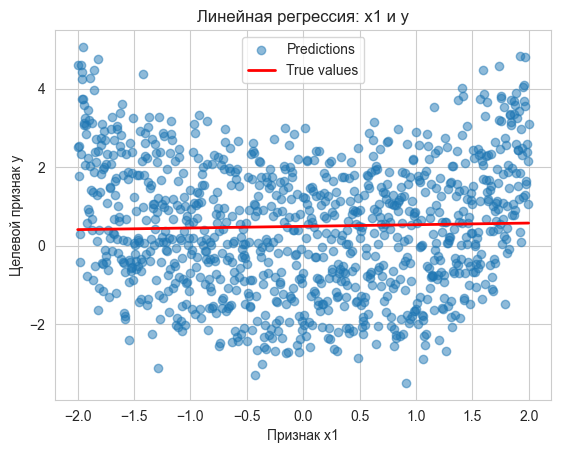

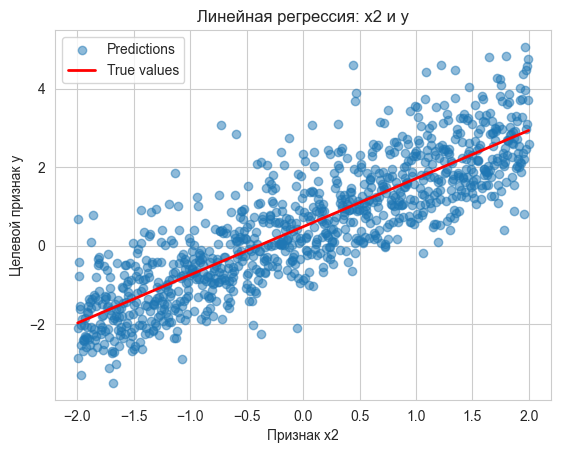

In [50]:
# коэффициенты модели
a_x1 = model_x1.coef_[0]      # коэффициент для x1 (берем первый)
b_x1 = model_x1.intercept_    # Intercept для модели x1
plt.scatter(rg['x1'], rg['y'], alpha=0.5, label='Predictions')  # рисуем точки
# линия регрессии для диапазона данных
x_min = rg['x1'].min()  # мин значение x1 в данных
x_max = rg['x1'].max()  # макс значение x1 в данных
plt.plot([x_min, x_max],
         [a_x1*x_min + b_x1, a_x1*x_max + b_x1],        # уравнения
         "r", linewidth=2, label='True values')     # линия
# подписи
plt.xlabel('Признак x1')    # подпись оси Ox
plt.ylabel('Целевой признак y')     # подпись оси Oy
plt.title('Линейная регрессия: x1 и y')
plt.legend()        # легенда
plt.grid(True)      # сетка
plt.show()          # показать
# ДЛЯ МОДЕЛИ x2:
a_x2 = model_x2.coef_[0]
b_x2 = model_x2.intercept_
plt.scatter(rg['x2'], rg['y'], alpha=0.5, label='Predictions')
x_min = rg['x2'].min()
x_max = rg['x2'].max()
plt.plot([x_min, x_max],
         [a_x2*x_min + b_x2, a_x2*x_max + b_x2],
         "r", linewidth=2, label='True values')
plt.xlabel('Признак x2')
plt.ylabel('Целевой признак y')
plt.title('Линейная регрессия: x2 и y')
plt.legend()
plt.grid(True)
plt.show()

Был построен график с разницей между предсказанным и истинным значением для каждой точки валидационной выборки. На графике отображены остатки моделей - разности между фактическими значениями целевой переменной и предсказаниями, полученными моделями для признаков x1 и x2. Анализ остатков позволяет оценить качество моделей: для модели x1 наблюдается значительный разброс точек вокруг нулевой линии, что указывает на большую ошибку предсказания. Для модели x2 разброс остатков существенно меньше, точки расположены ближе к нулевой линии, что свидетельствует о более точных предсказаниях. Это подтверждает ранее сделанный вывод о том, что признак x2 имеет более сильную линейную связь с целевой переменной.

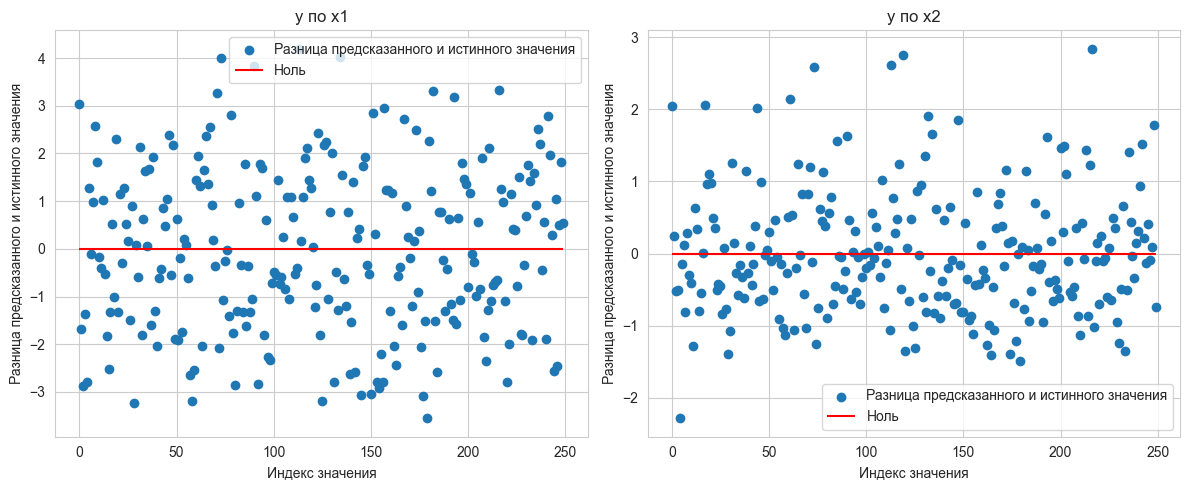

In [51]:
difference_x1 = y_valid - predictions_x1_valid
difference_x2 = y_valid - predictions_x2_valid

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(range(len(difference_x1)), difference_x1, label='Разница предсказанного и истинного значения')
plt.hlines(0, xmin=0, xmax=len(difference_x1)-1, colors='red', label="Ноль")
plt.title('y по x1')
plt.xlabel('Индекс значения')
plt.ylabel('Разница предсказанного и истинного значения')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(range(len(difference_x2)), difference_x2, label='Разница предсказанного и истинного значения')
plt.hlines(0, xmin=0, xmax=len(difference_x2)-1, colors='red', label='Ноль')
plt.title('y по x2')
plt.xlabel('Индекс значения')
plt.ylabel('Разница предсказанного и истинного значения')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Был построен график сравнения фактических и предсказанных значений для обеих моделей. На графиках по оси X отложены фактические значения целевой переменной из валидационной выборки, по оси Y - предсказанные значения моделей. Красная линия под углом 45 градусов представляет идеальный случай, когда предсказания полностью совпадают с фактическими значениями. Для модели, построенной на признаке x1, наблюдается значительный разброс синих точек относительно красной линии, что свидетельствует о низкой точности предсказаний. В то время как для модели на признаке x2 точки расположены значительно ближе к идеальной линии, демонстрируя более высокую точность предсказаний. Это визуальное сравнение подтверждает ранее сделанные выводы о том, что признак x2 имеет более сильную линейную зависимость с целевой переменной.

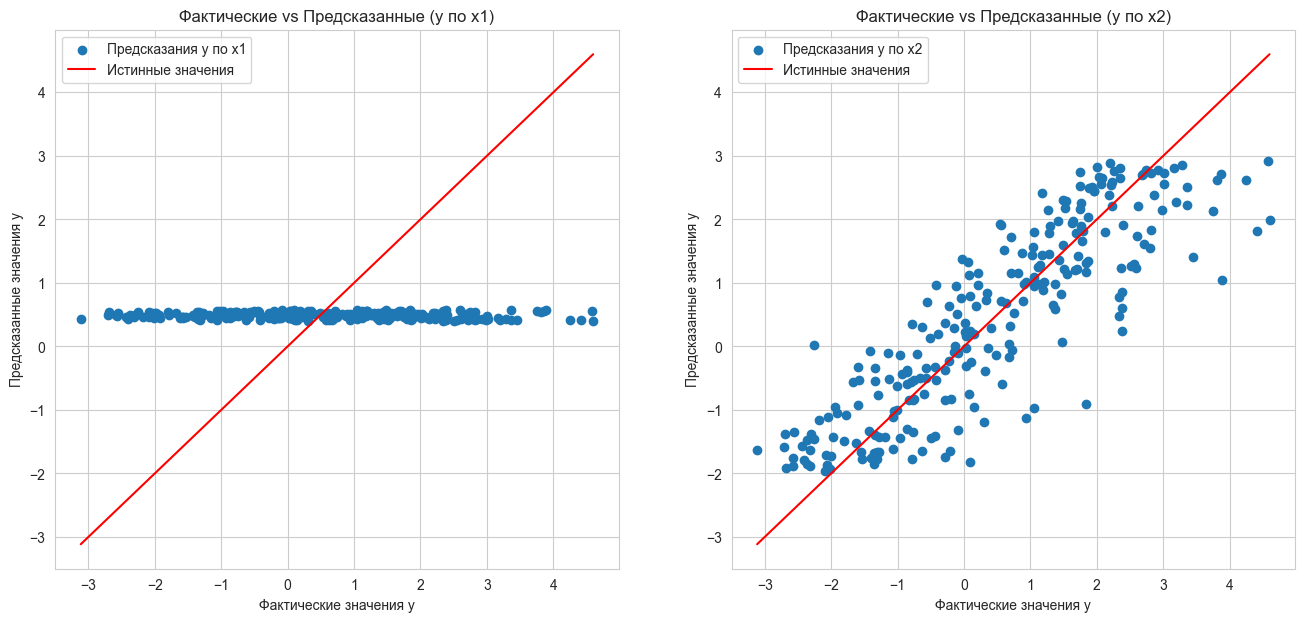

In [52]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_valid, predictions_x1_valid, label='Предсказания y по x1')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', label='Истинные значения')
plt.xlabel('Фактические значения y')
plt.ylabel('Предсказанные значения y')
plt.title('Фактические vs Предсказанные (y по x1)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_valid, predictions_x2_valid, label='Предсказания y по x2')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', label='Истинные значения')
plt.xlabel('Фактические значения y')
plt.ylabel('Предсказанные значения y')
plt.title('Фактические vs Предсказанные (y по x2)')
plt.legend()
plt.grid(True)

plt.show()

---

### 2. Полиномиальная регрессия

На этапе полиномиальной регрессии было принято решение использовать признак x1, поскольку он показал более низкую метрику MSE в сравнении с x2 при линейной регрессии, что указывало на потенциал для улучшения модели. Для реализации полиномиальной регрессии был применен метод PolynomialFeatures, который позволяет преобразовать исходные признаки в полиномиальные. Степень полинома была выбрана на основе анализа качества модели и предотвращения переобучения. Данные были разделены на обучающую и валидационную выборки в соотношении 70/30 с фиксированным random_state для обеспечения воспроизводимости результатов.

In [53]:
X1_train, X1_valid, y_train, y_valid = train_test_split(rg[['x1']], rg['y'], test_size=0.3, random_state=22)

Для реализации полиномиальной регрессии был создан преобразователь PolynomialFeatures со степенью полинома 4. На обучающей выборке был выполнен метод fit_transform, который обучил преобразователь и сразу применил его к данным, создав полиномиальные признаки до четвертой степени включительно. Для валидационной выборки использовался метод transform, который применил уже обученное преобразование без переобучения. Затем была инициирована и обучена модель линейной регрессии на полученных полиномиальных признаках. Модель была обучена на преобразованной обучающей выборке, что позволило учесть нелинейные зависимости между признаком x1 и целевой переменной y.

In [54]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X1_train)
X_valid_poly = poly.transform(X1_valid)
model = LinearRegression()
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


После обучения модели полиномиальной регрессии были получены предсказания на валидационной выборке. Модель спрогнозировала значения целевой переменной y на основе преобразованных полиномиальных признаков четвертой степени, что позволило учесть нелинейные зависимости в данных.

In [55]:
y_pred = model.predict(X_valid_poly)

Для оценки качества полиномиальной регрессии были рассчитаны метрики: MAE = 0.759 и R² = 0.039. Низкое значение R² указывает на слабую предсказательную способность модели, несмотря на использование полинома 4-й степени.

In [56]:
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

display(pd.DataFrame({
    "MAE": [mae],
    "R2": [r2]
}))

,MAE,R2
0,1.224522,0.19583


Был построен график полиномиальной регрессии четвертой степени. На нем отображены фактические точки данных и полиномиальная кривая, показывающая нелинейную зависимость между признаком x1 и целевой переменной y. Визуально видно, что кривая пытается аппроксимировать сложное распределение данных, однако низкое значение R² подтверждает недостаточное качество модели.

C:\Users\Юля\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


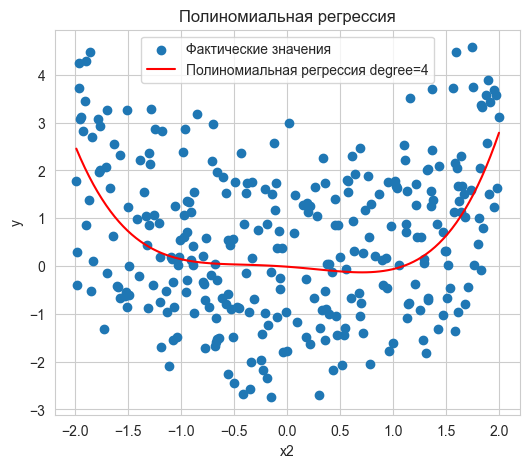

In [57]:
plt.figure(figsize=(6, 5))
plt.scatter(X1_valid, y_valid, label='Фактические значения')

X_line = np.linspace(X1_valid.min(), X1_valid.max(), 100).reshape(-1, 1)
X_line_poly = poly.transform(X_line)
y_line = model.predict(X_line_poly)
plt.plot(X_line, y_line, color='red', label=f'Полиномиальная регрессия degree={4}')

plt.xlabel('x2')
plt.ylabel('y')
plt.title(f'Полиномиальная регрессия')
plt.legend()
plt.grid(True)
plt.show()

Была повторно обучена полиномиальная регрессия с увеличением степени полинома до 8. Однако метрики качества ухудшились: MAE увеличился до 0.763, а R² снизился до 0.033. Это указывает на переобучение модели из-за слишком высокой сложности полинома.

In [58]:
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X1_train)
X_valid_poly = poly.transform(X1_valid)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_valid_poly)

mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

display(pd.DataFrame({
    "MAE": [mae],
    "R2": [r2]
}))

,MAE,R2
0,1.225973,0.190054


Был визуализирован график полиномиальной регрессии 8-й степени. Кривая модели демонстрирует чрезмерно сложную форму с резкими колебаниями, что является явным признаком переобучения. Модель слишком точно подстроилась под обучающие данные и потеряла способность к обобщению, что объясняет ухудшение метрик на валидационной выборке.

C:\Users\Юля\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


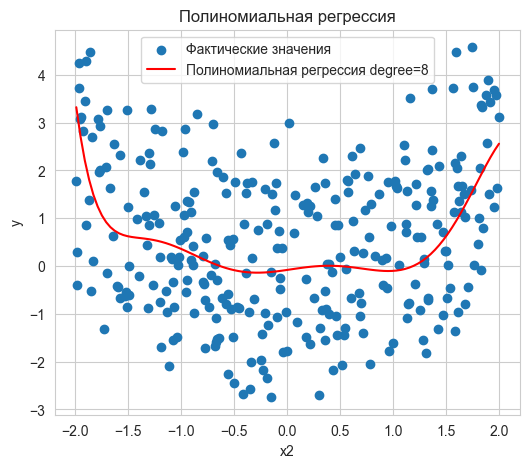

In [59]:
plt.figure(figsize=(6, 5))
plt.scatter(X1_valid, y_valid, label='Фактические значения')

X_line = np.linspace(X1_valid.min(), X1_valid.max(), 100).reshape(-1, 1)
X_line_poly = poly.transform(X_line)
y_line = model.predict(X_line_poly)
plt.plot(X_line, y_line, color='red', label=f'Полиномиальная регрессия degree={8}')

plt.xlabel('x2')
plt.ylabel('y')
plt.title(f'Полиномиальная регрессия')
plt.legend()
plt.grid(True)
plt.show()

При сравнении полиномиальных регрессий разных степеней было выявлено, что увеличение сложности модели с 4 до 8 степени не улучшило, а ухудшило результаты. Модель с полиномом 4 степени показала слабую предсказательную способность, а при увеличении степени до 8 возникло переобучение, что подтвердилось снижением метрики R² и появлением чрезмерно сложной кривой, не способной к обобщению.

---

### 3. Решение задачи регрессии различными методами

Был загружен датасет salary.csv, содержащий информацию о зарплатах сотрудников. Датасет состоит из 1500 наблюдений и 15 переменных, включая числовые признаки (возраст, доход, опыт работы, тестовый балл и др.) и категориальные переменные (образование, город, тип работы, семейное положение и др.). Пропущенные значения в данных отсутствуют.

In [60]:
import pandas as pd
import numpy as np

df = pd.read_csv('salary.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


В качестве целевой переменной для предсказания была выделена переменная salary, представляющая заработную плату сотрудников. Для ее анализа были построены гистограмма и boxplot. Гистограмма позволяет оценить распределение частот значений зарплат, а boxplot наглядно показывает основные статистические характеристики распределения, включая медиану, квартили и наличие выбросов в данных.

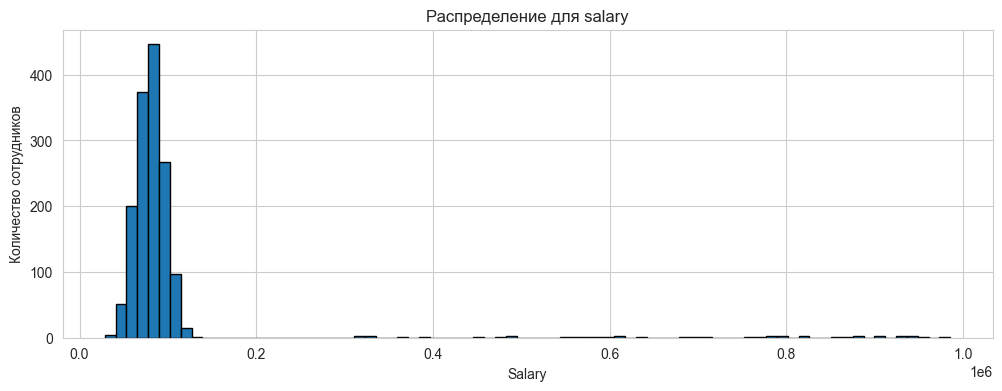

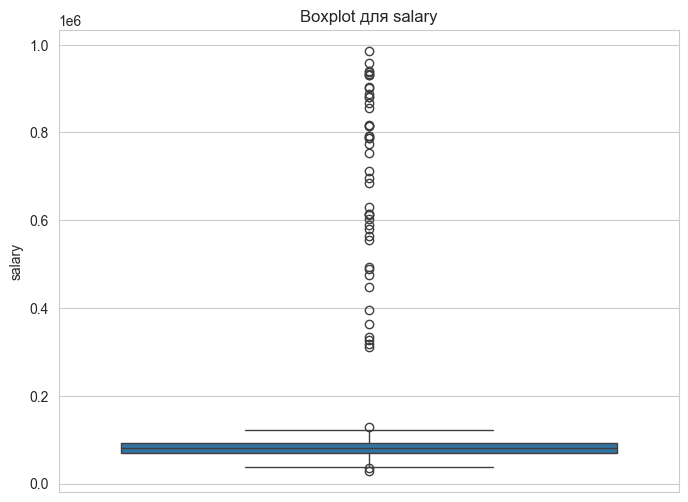

In [61]:
plt.figure(figsize=(12, 4))
plt.hist(df['salary'], bins='auto', edgecolor='black')
plt.title('Распределение для salary')
plt.xlabel('Salary')
plt.ylabel('Количество сотрудников')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['salary'])
plt.title('Boxplot для salary')
plt.show()

Для обработки выбросов в целевой переменной salary был применен метод межквартильного размаха (IQR). Были рассчитаны первая и третья квартили, на их основе определены границы допустимых значений, после чего создан очищенный датафрейм с исключенными экстремальными значениями. На повторно построенных гистограмме и boxplot визуально заметно, что распределение зарплат стало более сбалансированным, что должно положительно повлиять на качество будущей модели предсказания.

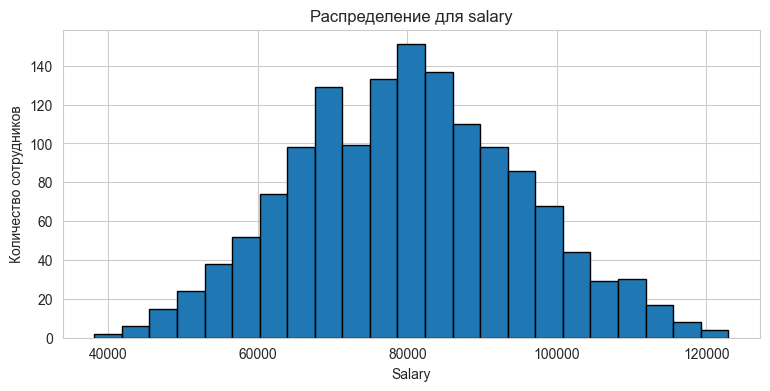

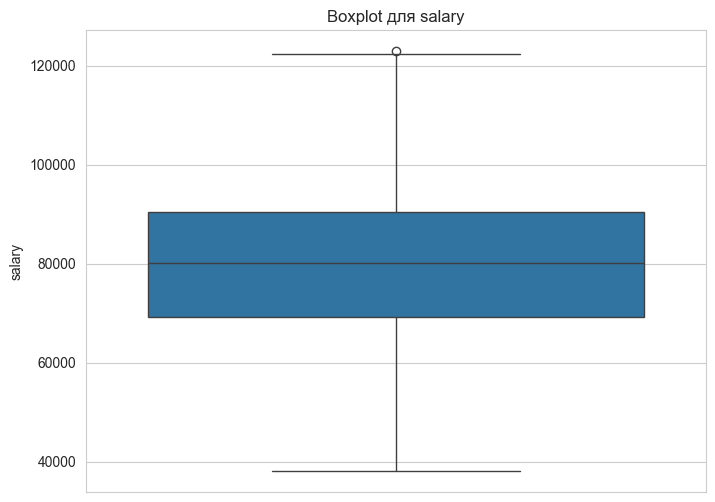

In [62]:
Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_clean = df[(df["salary"] >= lower) & (df["salary"] <= upper)]

plt.figure(figsize=(9, 4))
plt.hist(df_clean['salary'], bins='auto', edgecolor='black')
plt.title('Распределение для salary')
plt.xlabel('Salary')
plt.ylabel('Количество сотрудников')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean['salary'])
plt.title('Boxplot для salary')
plt.show()

Категориальные переменные были преобразованы в числовой формат для возможности использования в моделях машинного обучения. Бинарные признаки закодированы значениями 0 и 1, а порядковые - числовыми значениями с сохранением естественной последовательности.

In [63]:
df_clean['car'] = df_clean['car'].map({'Yes': 1, 'No': 0})
df_clean['remote_work'] = df_clean['remote_work'].map({'Yes': 1, 'No': 0})
df_clean['marital_status'] = df_clean['marital_status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
df_clean['education'] = df_clean['education'].map({'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3})

df_clean = df_clean[['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt', 'education', 'marital_status', 'car', 'remote_work', 'salary']]

C:\Users\Юля\AppData\Local\Temp\ipykernel_28676\699512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['car'] = df_clean['car'].map({'Yes': 1, 'No': 0})
C:\Users\Юля\AppData\Local\Temp\ipykernel_28676\699512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['remote_work'] = df_clean['remote_work'].map({'Yes': 1, 'No': 0})
C:\Users\Юля\AppData\Local\Temp\ipykernel_28676\699512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

Была построена матрица диаграмм рассеяния для визуального анализа взаимосвязей между числовыми признаками очищенного датасета. На матрице отображены парные зависимости между переменными, включая возраст, доход, опыт работы, тестовый балл, отработанные часы, расстояние до работы, сбережения, долги и целевую переменную - зарплату. Это позволяет выявить потенциальные линейные и нелинейные зависимости между признаками, а также оценить распределение каждой переменной.

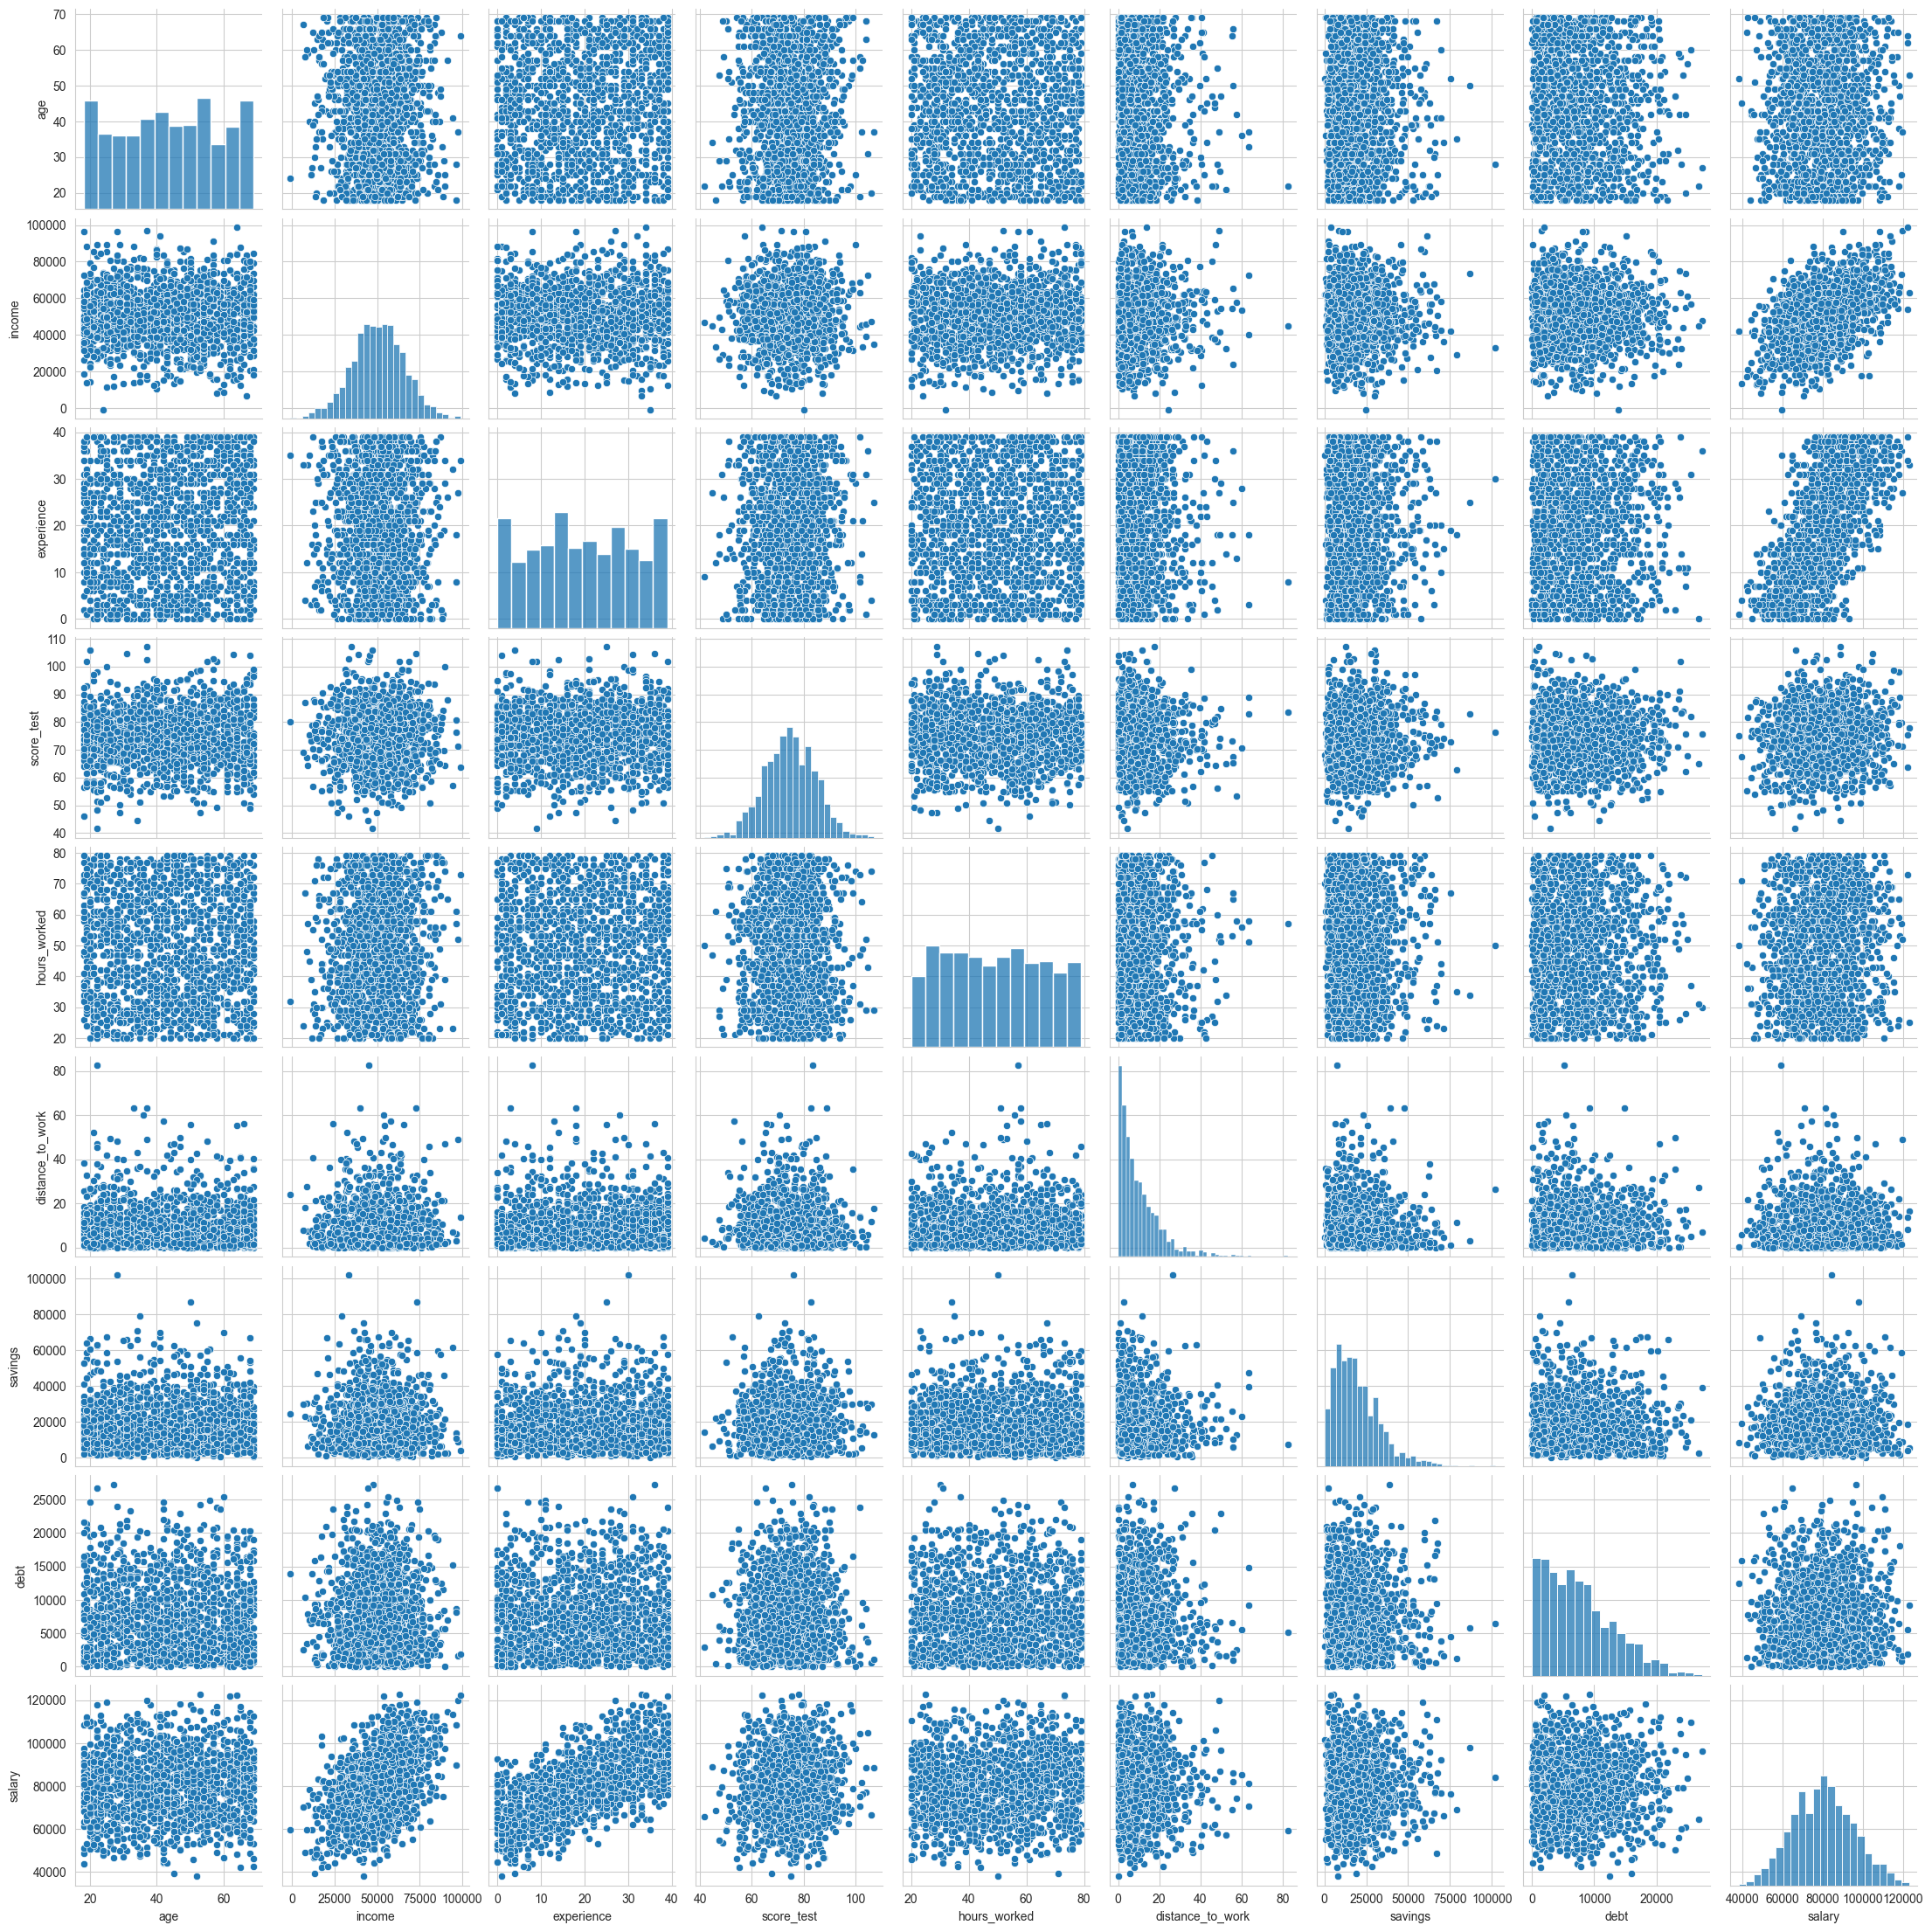

In [64]:
sns.pairplot(df_clean[['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt', 'salary']])
plt.show()

Данные были разделены на обучающую и валидационную выборки. Из подготовленного датафрейма выделена целевая переменная salary и матрица признаков, после чего данные разделены в соотношении 70% на обучение модели и 30% на валидацию результатов.

In [65]:
X = df_clean.drop('salary', axis=1)
y = df_clean['salary']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

Была выполнена нормализация числовых признаков с использованием StandardScaler. Были обработаны следующие переменные: возраст, доход, опыт работы, тестовый балл, отработанные часы, расстояние до работы, сбережения, долги и уровень образования. Масштабирование проведено на основе параметров, полученных на обучающей выборке, после чего преобразование применено как к обучающим, так и к валидационным данным для обеспечения согласованности признаков.

In [66]:
num_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt', 'education']

scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train[num_features])
X_valid[num_features] = scaler.transform(X_valid[num_features])

display(X_train)

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,marital_status,car,remote_work
855,0.087851,0.504540,-0.636712,-0.334632,-1.253898,-0.987009,-0.598782,-0.464628,-0.300951,1,1,0
1357,-0.246443,-0.362070,-0.113542,2.063865,-0.843416,-0.502620,-0.034599,-0.811781,-1.481518,1,1,1
387,0.288427,0.434452,-1.334271,-0.883917,-1.547099,1.152337,-0.671695,-1.360210,-0.300951,1,0,1
1262,0.890155,-0.438472,-0.287932,-0.220972,-1.488459,-0.041305,-1.263652,1.394709,-1.481518,1,1,1
1436,0.422144,-0.068825,0.932797,0.285993,-1.664380,0.255216,-0.289282,0.056070,-0.300951,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1119,-0.447019,-2.153859,1.630356,-0.084893,-1.136617,-0.994580,-0.847673,-0.011501,2.060181,0,0,1
1481,0.890155,-0.454236,-0.723907,-0.080335,1.678116,-0.207756,0.285360,-0.739787,-0.300951,1,1,1
928,0.890155,0.943887,0.584017,1.297871,-0.022452,-0.761315,-1.032458,-1.357966,-0.300951,0,0,1
1268,1.090731,1.235306,1.281577,2.021088,-0.667495,-0.621238,-0.076867,-0.158352,-0.300951,1,1,1


Была обучена модель линейной регрессии с использованием алгоритма LinearRegression. Модель прошла обучение на подготовленных и нормализованных данных обучающей выборки, включающей числовые и преобразованные категориальные признаки. В процессе обучения алгоритм настроил коэффициенты регрессии для минимизации ошибки предсказания целевой переменной salary.

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Были получены предсказания обученной модели на валидационной выборке и рассчитаны метрики качества. Модель линейной регрессии показала следующие результаты: средняя абсолютная ошибка (MAE), среднеквадратичная ошибка (MSE), корень из среднеквадратичной ошибки (RMSE) и коэффициент детерминации (R²). Значения метрик позволяют оценить точность предсказаний модели и ее способность объяснять дисперсию целевой переменной salary.

In [68]:
y_pred = model.predict(X_valid)

mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print(f"MAE = {mae},\nMSE = {mse},\nRMSE = {rmse},\nR2 = {r2}")

MAE = 5049.184956465739,
MSE = 38289648.18203007,
RMSE = 6187.8629737600095,
R2 = 0.832478282845403


Был создан датафрейм для сравнения истинных и предсказанных значений целевой переменной salary. Таблица содержит два столбца: Actual с фактическими значениями зарплат из валидационной выборки и Predicted с предсказанными моделью значениями. Для визуальной оценки качества предсказаний выведены первые 10 строк датафрейма, что позволяет напрямую сравнить соответствующие друг другу реальные и спрогнозированные значения.

In [69]:
result_df = pd.DataFrame({
    'Actual': y_valid,
    'Predicted': y_pred
})

result_df.head(10)

,Actual,Predicted
824,96001.631026,103841.873543
1208,107339.729007,100194.825678
400,72960.703477,60337.204752
435,100919.791973,98746.304879
1147,97333.117550,94467.708285
1084,69183.273232,74999.178497
782,101360.368094,99900.743863
1474,94662.427223,86646.204672
235,69366.606678,70857.529273
1189,70354.085756,78244.893188


Был создан датафрейм с признаками и соответствующими коэффициентами обученной модели линейной регрессии, отсортированный по убыванию влияния признаков. Анализ коэффициентов позволяет оценить важность каждого признака для предсказания зарплаты: признаки с положительными коэффициентами увеличивают прогнозируемую зарплату, а с отрицательными - уменьшают. Наибольшее влияние оказывают признаки с наибольшими по модулю значениями коэффициентов, что указывает на их значимость в модели.

In [70]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
2,experience,10379.521196
1,income,7201.569373
8,education,5426.393758
3,score_test,1248.722619
4,hours_worked,523.972194
0,age,361.058282
11,remote_work,159.920118
9,marital_status,108.960237
6,savings,-70.254222
7,debt,-135.763876


Был построен график сравнения фактических и предсказанных значений зарплаты. На диаграмме рассеяния отображены предсказания модели относительно реальных данных, а красная линия представляет идеальный случай полного совпадения прогноза с фактическими значениями. Визуальный анализ позволяет оценить качество работы модели: чем ближе точки к диагональной линии, тем точнее предсказания. Распределение точек относительно линии идеального предсказания демонстрирует общую точность модели линейной регрессии.

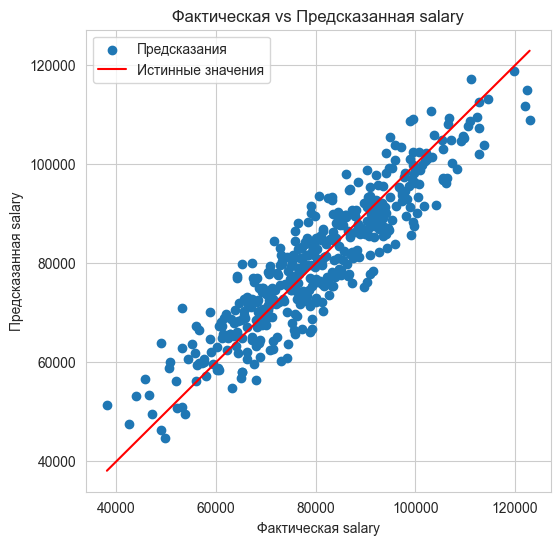

In [71]:
plt.figure(figsize=(6, 6))
plt.scatter(y_valid, y_pred, label='Предсказания')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', label='Истинные значения')
plt.xlabel('Фактическая salary')
plt.ylabel('Предсказанная salary')
plt.title('Фактическая vs Предсказанная salary')
plt.legend()
plt.grid(True)
plt.show()

Была реализована регрессия методом k-ближайших соседей с использованием алгоритма KNeighborsRegressor. Модель была обучена с параметром n_neighbors=12 на подготовленных данных обучающей выборки. После обучения получены предсказания для валидационной выборки, что позволяет сравнить эффективность данного подхода с ранее реализованной линейной регрессией.

In [72]:
knn_model = KNeighborsRegressor(n_neighbors=12)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_valid)

Было выполнено сравнение двух моделей регрессии - линейной регрессии и метода k-ближайших соседей. На одном графике визуализированы предсказания обеих моделей относительно фактических значений зарплаты. Зеленым цветом обозначены предсказания линейной регрессии, синим - метода k-ближайших соседей, красная линия представляет идеальное совпадение прогноза с реальностью. Для количественного сравнения рассчитаны метрики качества обеих моделей: MAE, MSE, RMSE и R². Анализ метрик и визуальное расположение точек относительно диагональной линии позволяют сделать вывод об эффективности каждого метода и определить, какая из моделей лучше справляется с предсказанием заработной платы на основе имеющихся признаков.

In [73]:
def print_metrics(y_true, y_pred, model_name):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  display(f"{model_name}: MAE={mae}, MSE={mse}, RMSE={rmse}, R2={r2}")

print_metrics(y_valid, y_pred, "Линейная регрессия")
print_metrics(y_valid, y_pred_knn, "k-ближайших соседей")

'Линейная регрессия: MAE=5049.184956465739, MSE=38289648.18203007, RMSE=6187.8629737600095, R2=0.832478282845403'

'k-ближайших соседей: MAE=6817.751440446597, MSE=72949427.82057005, RMSE=8541.043719626428, R2=0.6808376677724985'

Модель k-ближайших соседей показала более точные предсказания, так как ее точки расположены ближе к линии идеального совпадения. Линейная регрессия демонстрирует большую ошибку, что видно по значительному разбросу предсказаний относительно диагонали.

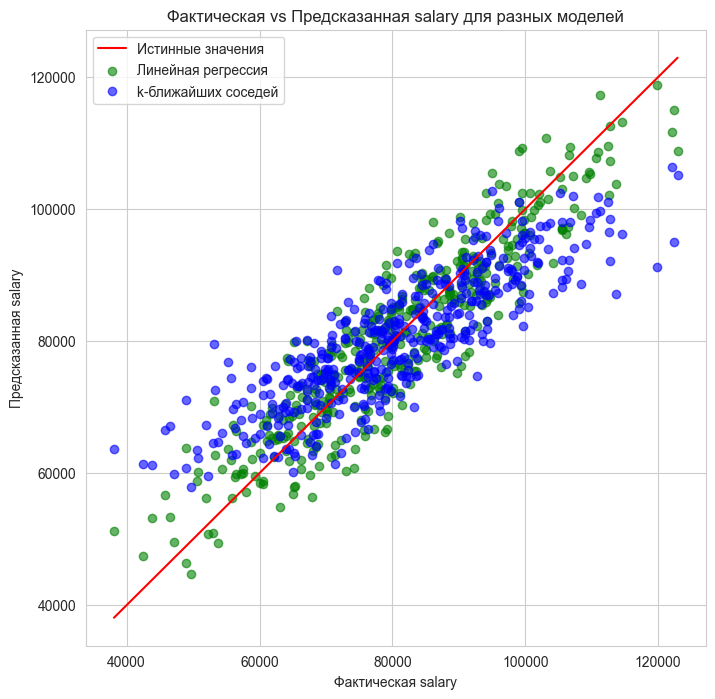

In [74]:
plt.figure(figsize=(8, 8))

plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', label='Истинные значения')

plt.scatter(y_valid, y_pred, color='green', alpha=0.6, label='Линейная регрессия')
plt.scatter(y_valid, y_pred_knn, color='blue', alpha=0.6, label='k-ближайших соседей')

plt.xlabel('Фактическая salary')
plt.ylabel('Предсказанная salary')
plt.title('Фактическая vs Предсказанная salary для разных моделей')
plt.legend()
plt.grid(True)
plt.show()

---

### Вывод

На основе проведенного анализа регрессионных моделей для предсказания заработной платы можно сделать следующие выводы:

**Сравнение эффективности моделей:**
Метод k-ближайших соседей продемонстрировал более высокую точность предсказаний по сравнению с линейной регрессией, что подтверждается лучшими значениями метрик MAE, MSE, RMSE и R². Визуальный анализ графика также показывает, что предсказания KNN располагаются ближе к линии идеального совпадения.

**Обоснование выбора метода:**
K-ближайших соседей целесообразнее использовать для данного набора данных, поскольку эта модель лучше учитывает сложные нелинейные зависимости между признаками и целевой переменной. Линейная регрессия, хотя и является более интерпретируемой, оказалась менее эффективной из-за ограничений линейной аппроксимации.

**Рекомендации:**
Для практического применения рекомендуется использовать метод k-ближайших соседей с оптимизацией гиперпараметров. Дополнительное улучшение результатов может быть достигнуто за счет feature engineering и тестирования других алгоритмов машинного обучения, таких как случайный лес или градиентный бустинг.